In [353]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [354]:
df_iot = pd.read_csv('projeto8-data_files/projeto8-training.csv')

In [355]:
df_iot.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,61200,Weekday,Monday
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,61800,Weekday,Monday
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,62400,Weekday,Monday
3,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,63600,Weekday,Monday
4,2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,734.0,92.0,5.333333,43.833333,4.8,44.919484,44.919484,64200,Weekday,Monday


In [356]:
df_iot['date'] = pd.to_datetime(df_iot['date'])
df_iot['minute'] = df_iot['date'].dt.minute

In [358]:
df_iot['minute'].diff().value_counts()

minute
 10.0    9196
 20.0    1935
-50.0    1860
-40.0     932
-30.0     334
 30.0     323
-20.0     112
 40.0      54
-10.0      37
 0.0       11
 50.0       8
Name: count, dtype: int64

<Axes: xlabel='minute'>

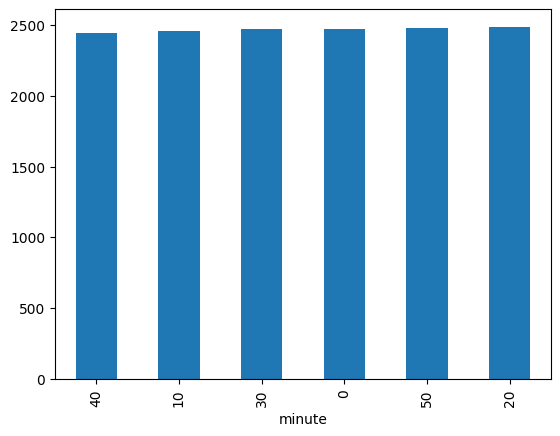

In [361]:
df_iot['minute'].value_counts().sort_values().plot(kind='bar')

In [362]:
df_iot['Appliances'].corr(df_iot['minute'])

0.010660590083587862

<Axes: xlabel='minute', ylabel='Appliances'>

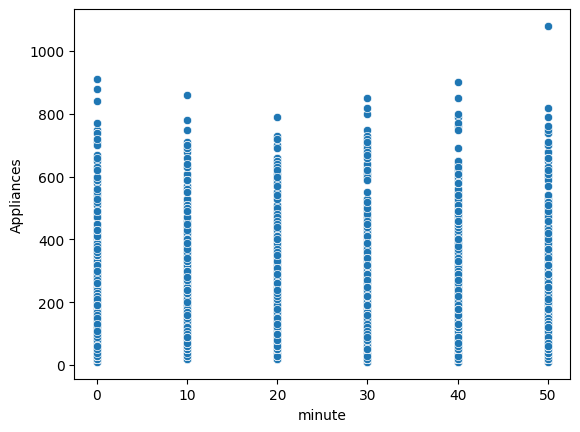

In [364]:
sns.scatterplot(x='minute', y='Appliances', data=df_iot)

In [374]:
# transform column Day_of_week
df_iot['Day_of_week'] = df_iot['date'].dt.dayofweek
# same for week
df_iot['Appliances'].corr(df_iot['Day_of_week'], method='spearman')

0.03767572943198356

<Axes: title={'center': 'Number of unique values per feature'}>

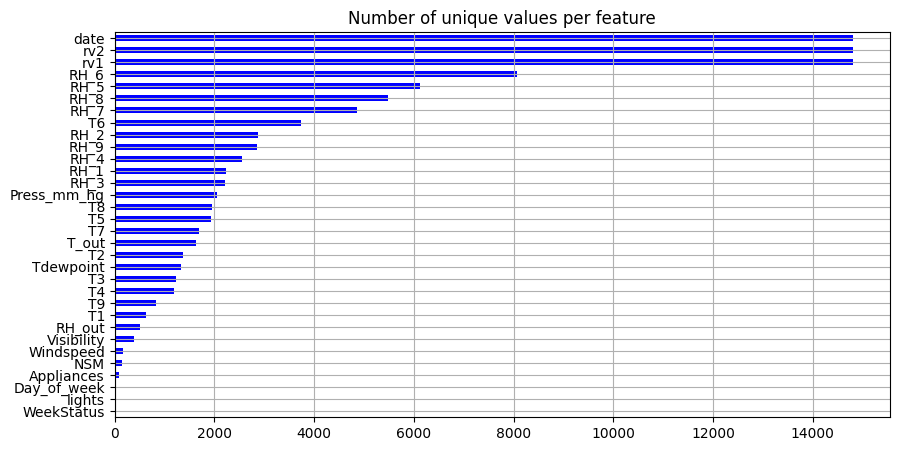

In [335]:
df_iot.nunique().sort_values().plot(kind='barh', figsize=(10,5), grid=True, color='blue', title='Number of unique values per feature')

<Axes: title={'center': 'Appliances energy consumption'}, xlabel='Appliances'>

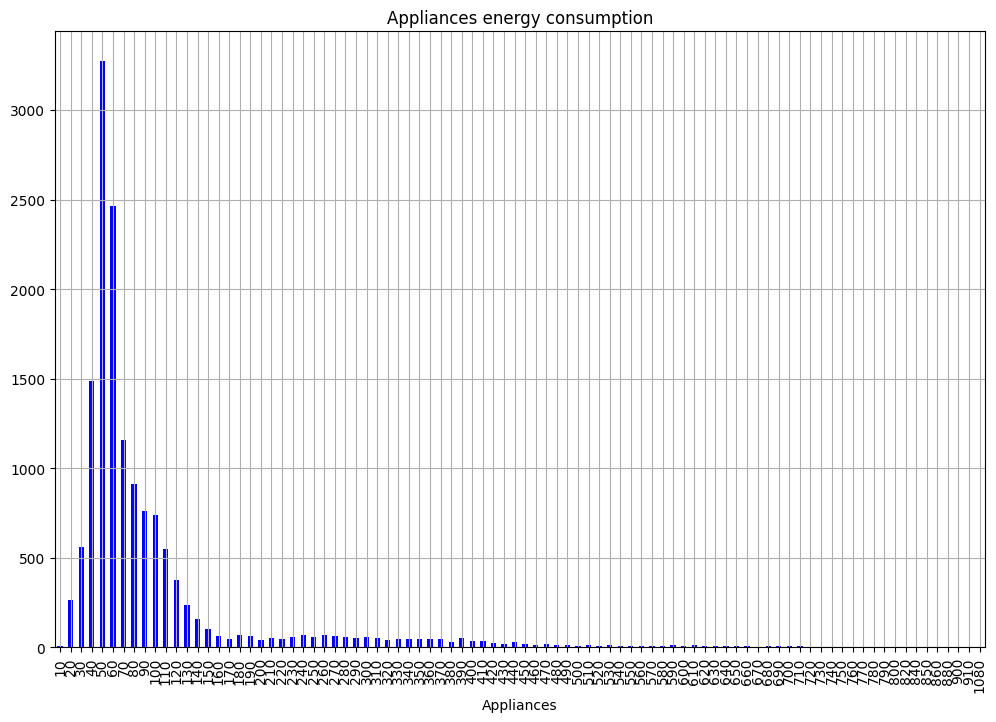

In [336]:
df_iot['Appliances'].value_counts().sort_index().plot(kind='bar', figsize=(12,8), grid=True, color='blue', title='Appliances energy consumption')

<Axes: xlabel='Appliances'>

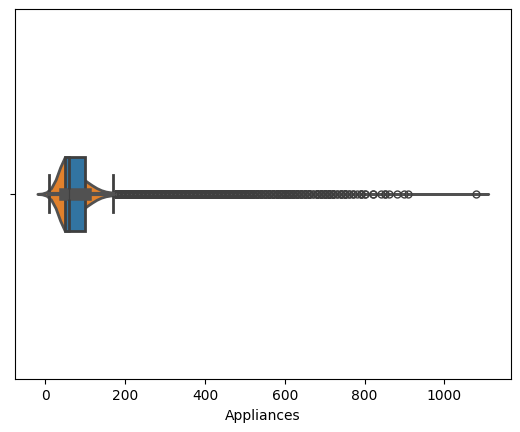

In [337]:
sns.boxplot(data=df_iot['Appliances'], orient='h', width=0.2, linewidth=2, fliersize=5)
sns.violinplot(data=df_iot['Appliances'], orient='h', width=0.2, linewidth=2)

In [338]:
df_iot['Appliances'].describe()

count    14803.000000
mean        98.011214
std        102.828019
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: Appliances, dtype: float64

<Axes: title={'center': 'Appliances energy consumption'}, xlabel='Appliances'>

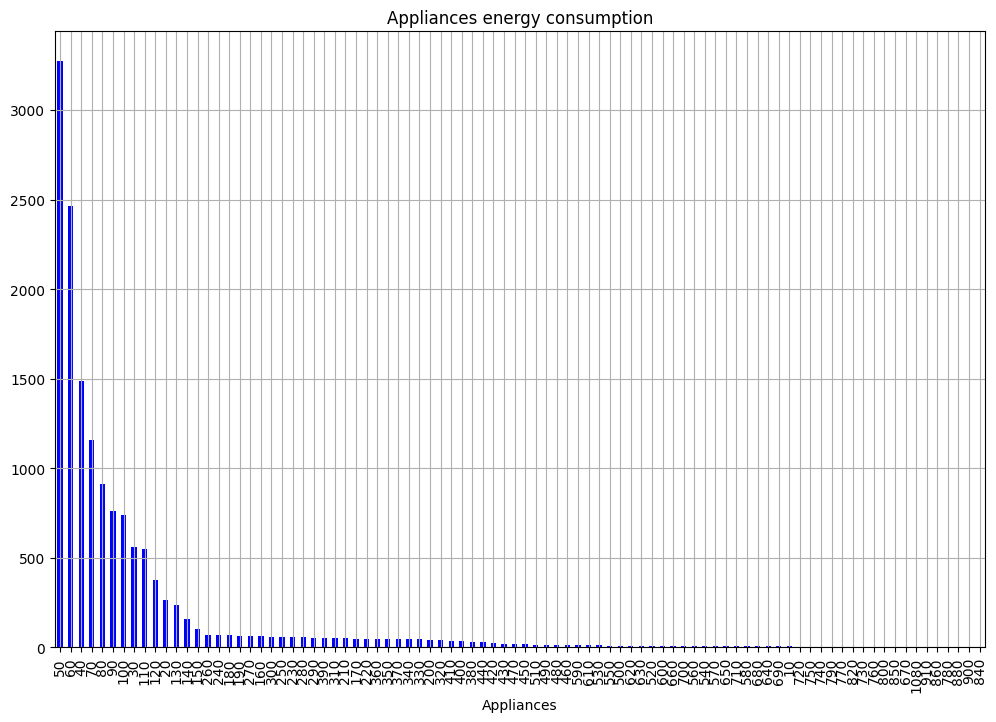

In [339]:
df_iot['Appliances'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(12,8), grid=True, color='blue', title='Appliances energy consumption')

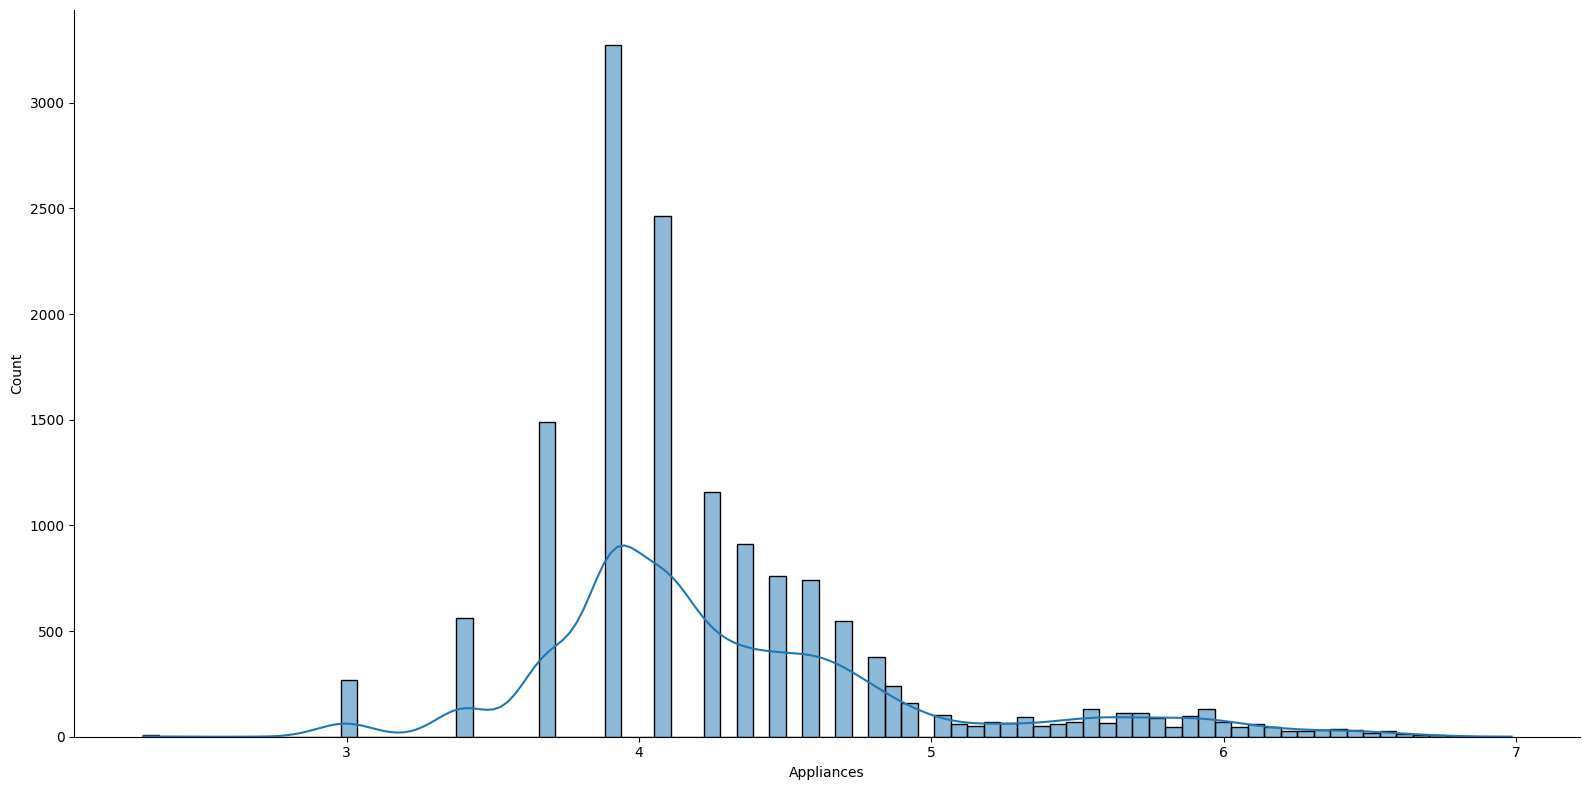

In [340]:
sns.displot(np.log(df_iot['Appliances']), kde=True, height=8, aspect=2)

/home/wagner/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


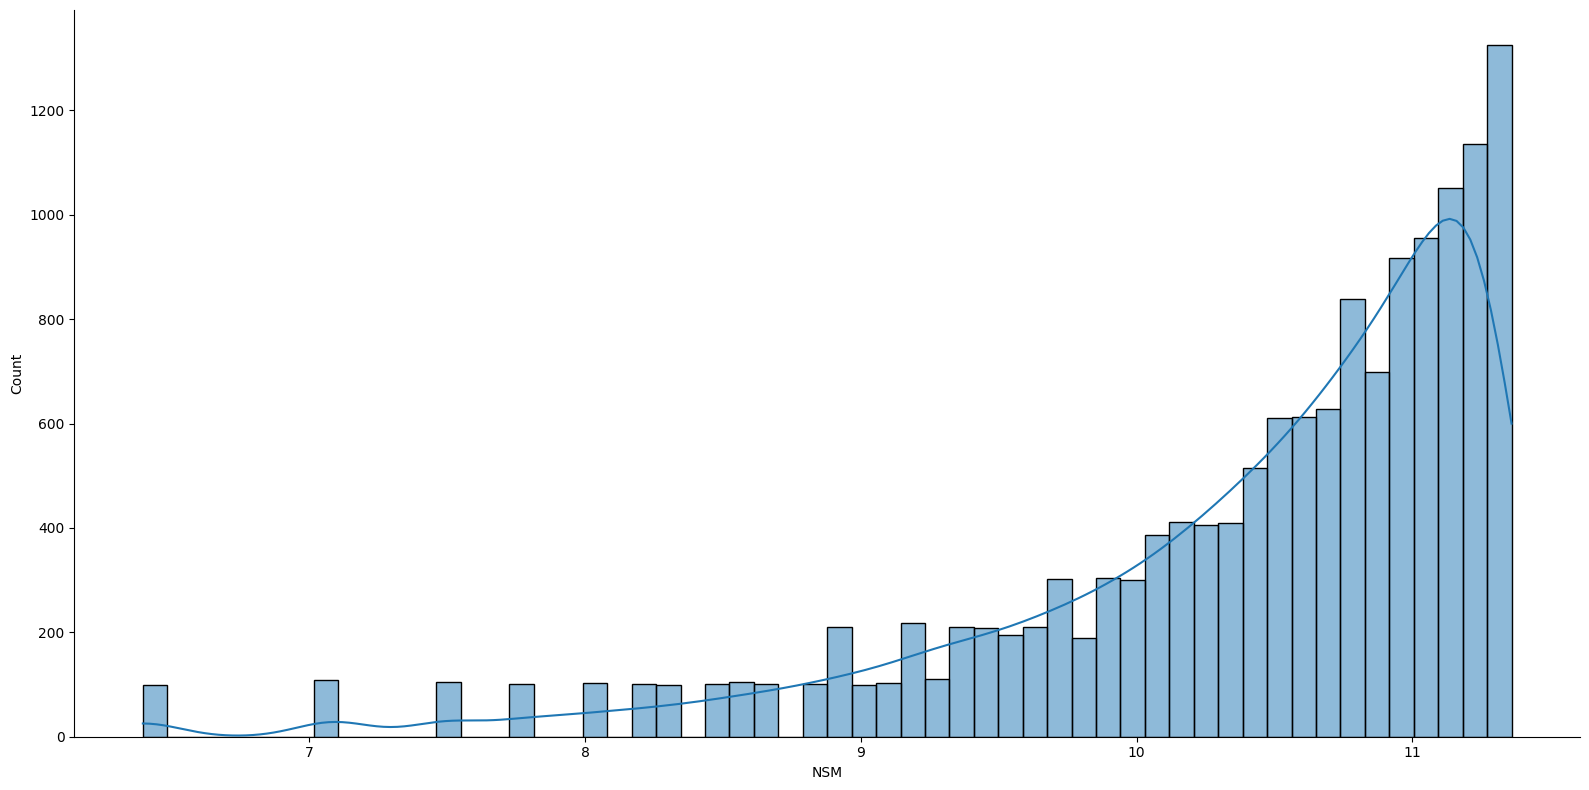

In [341]:
sns.displot(np.log(df_iot['NSM']), kde=True, height=8, aspect=2)

/home/wagner/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='NSM', ylabel='Count'>

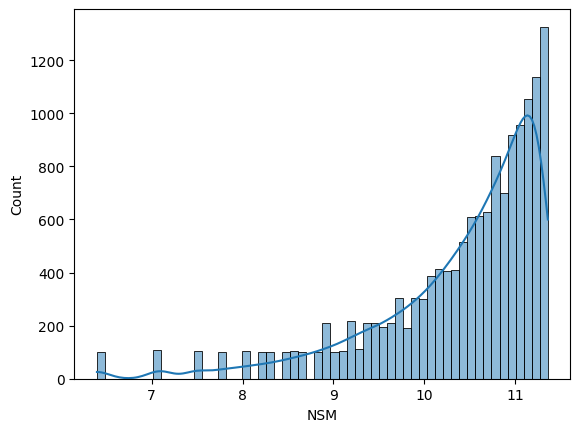

In [342]:
sns.histplot(np.log(df_iot['NSM']), kde=True)

In [343]:
df_iot['lights'].value_counts()

lights
0     11457
10     1621
20     1240
30      420
40       57
50        8
Name: count, dtype: int64

In [344]:
#df_iot['cat_lights'] = df_iot['lights'].apply(lambda x: 1 if x > 0 else 0)
#df_iot.drop(columns='lights', inplace=True)

In [345]:
df_iot['Day_of_week'].value_counts()

Day_of_week
Wednesday    2170
Tuesday      2161
Friday       2157
Thursday     2131
Monday       2101
Sunday       2061
Saturday     2022
Name: count, dtype: int64

In [346]:
df_iot['WeekStatus'].value_counts()

WeekStatus
Weekday    10720
Weekend     4083
Name: count, dtype: int64

In [347]:
# df_iot['Day_of_week'] = df_iot['Day_of_week'].map({'Saturday': 1, 'Sunday': 2, 'Monday': 3, 'Tuesday': 4, 'Wednesday': 5, 'Thursday': 6, 'Friday': 7})
# df_iot['WeekStatus'] = df_iot['WeekStatus'].map({'Weekday': 1, 'Weekend': 2})
df_iot.drop(['Day_of_week', 'WeekStatus'], axis=1, inplace=True)

In [ ]:
df_iot['date'] = pd.to_datetime(df_iot['date'])
df_iot = df_iot.sort_values(by=['date']).set_index('date').resample('1H').mean()
df_iot = df_iot.reset_index()
#df_iot['day'] = df_iot['date'].dt.day
#df_iot['month'] = df_iot['date'].dt.month
df_iot['hour'] = df_iot['date'].dt.hour
#df_iot['year'] = df_iot['date'].dt.year


/tmp/ipykernel_170902/1942311801.py:2: FutureWarning: The 'axis' keyword in DataFrame.resample is deprecated and will be removed in a future version.
  df_iot = df_iot.sort_values(by=['date']).set_index('date').resample('1H',axis=0).mean()


In [351]:
df_iot.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,hour
0,2016-01-11 17:00:00,56.000000,34.000000,19.890000,46.590000,19.200000,44.633833,19.790000,44.877333,18.941333,...,6.320000,733.740000,92.000000,6.200000,53.8,5.060000,23.105575,23.105575,62640.0,17
1,2016-01-11 18:00:00,63.333333,43.333333,19.834444,45.749167,19.210000,44.444444,19.750000,44.851111,18.890000,...,5.933333,734.233333,91.666667,5.333333,40.0,4.666667,22.528302,22.528302,66000.0,18
2,2016-01-11 19:00:00,217.500000,27.500000,20.387500,52.320000,19.830000,45.639167,20.003333,46.612500,18.981667,...,6.000000,734.704167,90.125000,6.000000,40.0,4.454167,31.982331,31.982331,69450.0,19
3,2016-01-11 20:00:00,112.500000,32.500000,20.942500,49.005833,20.239167,45.760625,20.205833,47.440000,19.140417,...,6.000000,735.266667,87.666667,6.000000,40.0,4.033333,27.721759,27.721759,73200.0,20
4,2016-01-11 21:00:00,104.000000,24.000000,21.302667,45.756667,20.572000,44.920667,20.370000,46.179333,19.432667,...,5.840000,735.560000,87.400000,6.000000,40.0,3.820000,18.767649,18.767649,77040.0,21


<Axes: title={'center': 'Appliances energy consumption'}>

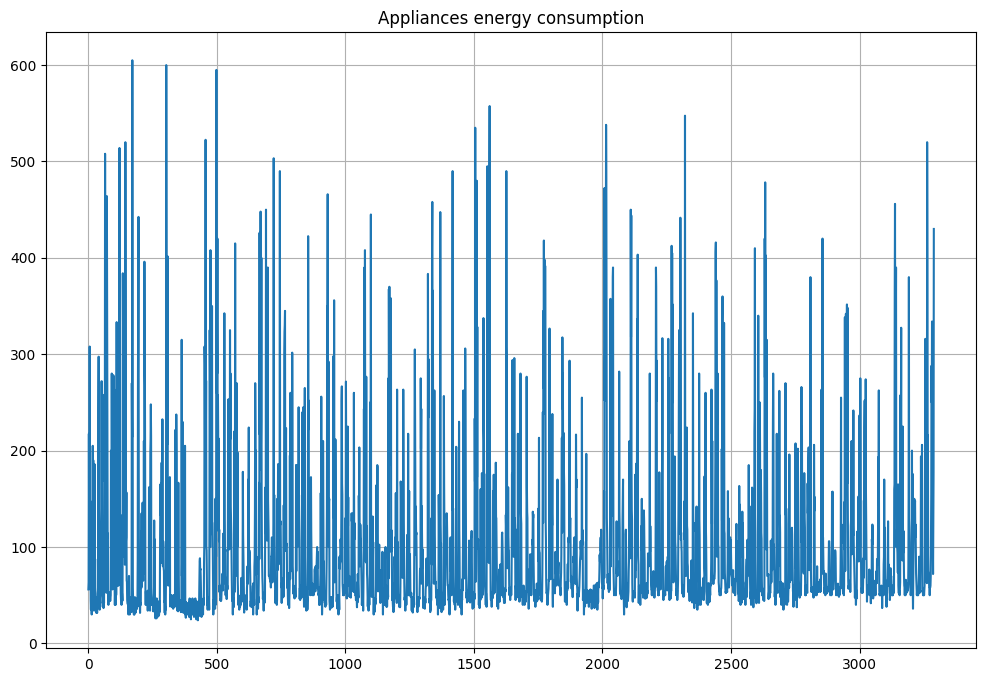

In [352]:
df_iot['Appliances'].plot(figsize=(12,8), grid=True, title='Appliances energy consumption')

<Axes: xlabel='hour', ylabel='Appliances'>

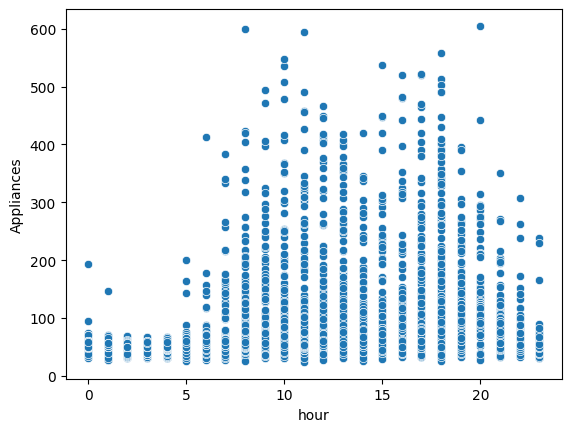

In [350]:
sns.scatterplot(y='Appliances', x='hour', data=df_iot)

In [ ]:
print(df_iot['Appliances'].corr(df_iot['hour']))
print(df_iot['Appliances'].corr(df_iot['NSM']))
print(df_iot['Appliances'].corr(df_iot['lights']))



0.2635863396011236
0.2636731204414462
0.2528562112613986


In [ ]:
#df_iot['cat_lights'] = df_iot['cat_lights'].apply(lambda x: 0 if x==0 else 1)
#df_iot.drop(columns='lights', inplace=True)

In [ ]:
df_iot.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,hour
3285,2016-05-27 14:00:00,110.0,2.0,25.540000,46.640000,26.431643,41.170464,28.364000,41.160667,24.660000,...,21.920000,755.800,59.000000,2.000000,21.600000,13.480000,31.266451,31.266451,51840.0,14
3286,2016-05-27 15:00:00,72.0,0.0,25.500000,45.686500,26.169714,41.010286,28.261333,40.316000,24.693333,...,22.133333,755.700,57.666667,2.000000,21.666667,13.266667,20.918568,20.918568,55200.0,15
3287,2016-05-27 16:00:00,135.0,0.0,25.487778,46.250000,26.000000,41.736190,27.953333,40.607778,24.700000,...,22.883333,755.375,55.000000,2.416667,22.583333,13.283333,23.229344,23.229344,59100.0,16
3288,2016-05-27 17:00:00,177.5,2.5,25.533333,46.885833,25.778643,42.544643,27.184167,41.158333,24.700000,...,22.700000,755.200,55.750000,3.375000,23.875000,13.325000,22.705022,22.705022,62550.0,17
3289,2016-05-27 18:00:00,430.0,10.0,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.700000,...,22.200000,755.200,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851,64800.0,18


In [ ]:
df_iot.shape

(3290, 31)

In [ ]:
df_iot.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'hour'],
      dtype='object')

In [ ]:
df_iot.duplicated().sum()

0

In [ ]:
df_iot.isnull().sum().sum()

0

In [ ]:
df_iot.describe().T

,count,mean,min,25%,50%,75%,max,std
date,3290,2016-03-20 05:30:00.000000256,2016-01-11 17:00:00,2016-02-14 23:15:00,2016-03-20 05:30:00,2016-04-23 11:45:00,2016-05-27 18:00:00,NaN
Appliances,3290.0,98.248126,24.0,50.0,62.5,110.0,605.0,84.274506
lights,3290.0,3.764184,0.0,0.0,0.0,3.333333,43.333333,6.964803
T1,3290.0,21.687776,16.79,20.748,21.598611,22.628681,26.192,1.606093
RH_1,3290.0,40.257934,27.205556,37.348083,39.649333,43.051563,55.28,3.943594
T2,3290.0,20.343136,16.1,18.824583,20.003333,21.508708,29.74,2.190871
RH_2,3290.0,40.418857,21.563333,37.904792,40.483889,43.276611,53.906224,4.052912
T3,3290.0,22.268241,17.26,20.79,22.1,23.305208,28.992229,2.005639
RH_3,3290.0,39.243852,29.700556,36.886444,38.5445,41.7625,49.348667,3.244116
T4,3290.0,20.856026,15.1,19.542083,20.655333,22.1,26.133714,2.041595


In [ ]:
# deletar linhas que tenham qualquer valor negativo exceto a coluna 'date'

# df_iot = df_iot[(df_iot >= 0).all(1)]


In [ ]:
df_iot[df_iot['Appliances']>1000]

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,hour


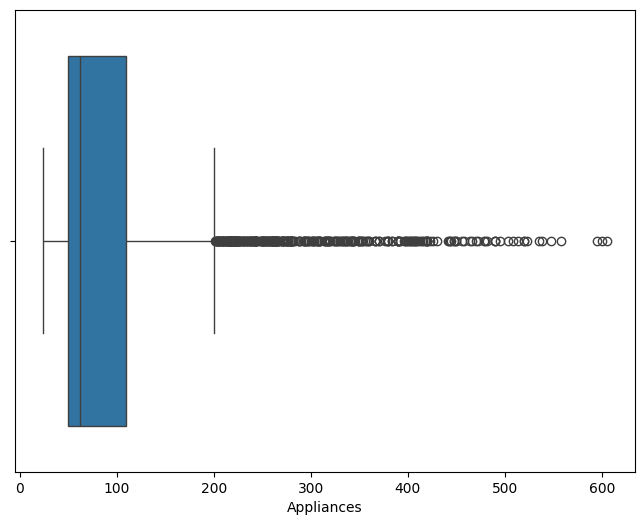

In [ ]:
plt.figure(figsize=[8,6])

sns.boxplot(data=df_iot,x='Appliances')

plt.show()

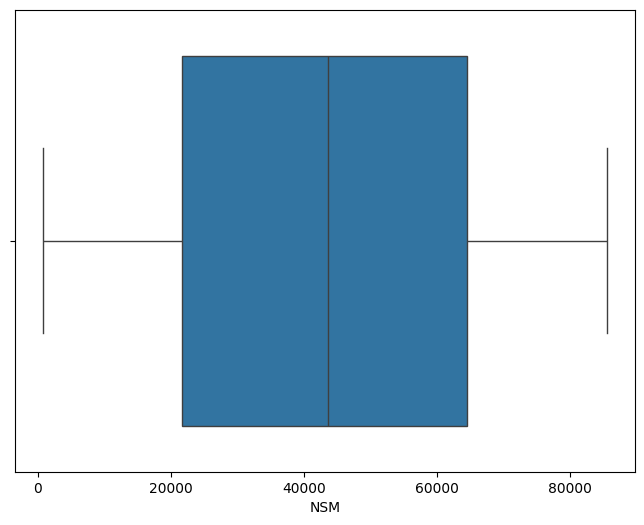

In [ ]:
plt.figure(figsize=[8,6])

sns.boxplot(data=df_iot,x='NSM')

plt.show()

In [ ]:
(df_iot['rv1']-df_iot['rv2']).sum()

0.0

In [ ]:
#sns.swarmplot(data=df_iot['Appliances'], orient='h',  linewidth=2)


In [ ]:
#df_clean = pd.get_dummies(df_iot.drop(columns=['date'])).copy()
#df_clean = df_iot.drop(columns=['date']).copy()
df_clean = df_iot.sort_values(by=['date']).copy()
df_clean.drop(['date'], axis=1, inplace=True)
#df_clean = df_clean[(df_clean >= 0).all(1)]

df_clean['roll3_Appliances'] = df_clean['Appliances'].shift(1).rolling(window=3,min_periods=1).mean()
df_clean['roll6_Appliances'] = df_clean['Appliances'].shift(1).rolling(window=6,min_periods=1).mean()
df_clean['roll12_Appliances'] = df_clean['Appliances'].shift(1).rolling(window=12,min_periods=1).mean()

df_clean['lag1_NSM'] = df_clean['NSM'].shift(1)
df_clean['lag1_Appliances'] = df_clean['Appliances'].shift(1)
df_clean['lag2_Appliances'] = df_clean['Appliances'].shift(2)
df_clean['lag3_Appliances'] = df_clean['Appliances'].shift(3)


df_clean.drop(columns=['rv1','rv2'], inplace=True)
df_clean.dropna(inplace=True)
print(df_clean)

      Appliances     lights         T1       RH_1         T2       RH_2  \
3     112.500000  32.500000  20.942500  49.005833  20.239167  45.760625   
4     104.000000  24.000000  21.302667  45.756667  20.572000  44.920667   
5     308.000000  22.000000  21.566667  44.756000  20.886667  44.202667   
6      56.666667  18.333333  21.531667  44.271111  20.934444  43.712500   
7      94.000000  16.000000  21.286000  44.906667  20.664667  43.996667   
...          ...        ...        ...        ...        ...        ...   
3285  110.000000   2.000000  25.540000  46.640000  26.431643  41.170464   
3286   72.000000   0.000000  25.500000  45.686500  26.169714  41.010286   
3287  135.000000   0.000000  25.487778  46.250000  26.000000  41.736190   
3288  177.500000   2.500000  25.533333  46.885833  25.778643  42.544643   
3289  430.000000  10.000000  25.500000  46.600000  25.264286  42.971429   

             T3       RH_3         T4       RH_4  ...  Tdewpoint      NSM  \
3     20.205833  47.44


Random Forest Performance:
Mean Squared Error: 1437.27
R² Score: 0.80
RMSE: 37.91

Feature Importance:
              Feature  Importance
31    lag1_Appliances    0.393724
30           lag1_NSM    0.070701
27   roll3_Appliances    0.045655
25                NSM    0.044328
32    lag2_Appliances    0.039906
0              lights    0.035844
20        Press_mm_hg    0.024421
33    lag3_Appliances    0.021662
10               RH_5    0.018641
23         Visibility    0.017098
3                  T2    0.016106
28   roll6_Appliances    0.016066
22          Windspeed    0.015792
9                  T5    0.015655
21             RH_out    0.015074
15                 T8    0.014855
29  roll12_Appliances    0.014212
13                 T7    0.013963
19              T_out    0.013831
24          Tdewpoint    0.013617
6                RH_3    0.012823
4                RH_2    0.012197
18               RH_9    0.012155
11                 T6    0.011297
16               RH_8    0.010717
14          

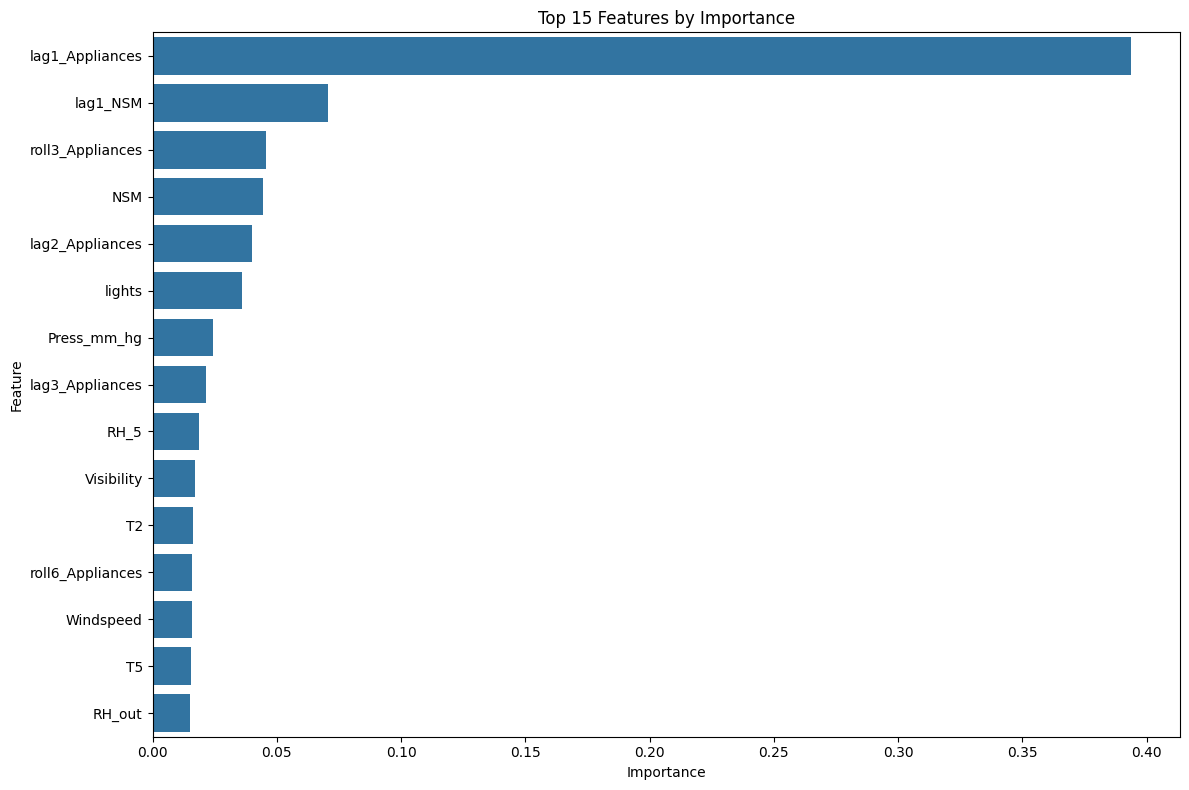


Number of features to keep for 80% importance: 16

Selected Features:
1. lag1_Appliances
2. lag1_NSM
3. roll3_Appliances
4. NSM
5. lag2_Appliances
6. lights
7. Press_mm_hg
8. lag3_Appliances
9. RH_5
10. Visibility
11. T2
12. roll6_Appliances
13. Windspeed
14. T5
15. RH_out
16. T8

Random Forest with Selected Features Performance:
Mean Squared Error: 910.51
R² Score: 0.87
RMSE: 30.17

Model Comparison:
Original Model (All Features) - R²: 0.7976, RMSE: 37.91
Selected Model (Top 16 Features) - R²: 0.8718, RMSE: 30.17


In [ ]:

# Split features and target variable
X = df_clean.drop('Appliances', axis=1).reset_index(drop=True)
y = df_clean['Appliances'].reset_index(drop=True)

from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
scaler = StandardScaler()
cols = list(X.columns)
X = pd.DataFrame(scaler.fit_transform(X),columns=cols)
scaler2 = MinMaxScaler()
X = pd.DataFrame(scaler2.fit_transform(X),columns=cols)

# Train Random Forest model
#rf = RandomForestRegressor(n_estimators=10, random_state=42)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=20, random_state=42,max_depth=10)
rf.fit(X, y)

# Predict on test set to evaluate model
y_pred = rf.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"\nRandom Forest Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"RMSE: {np.sqrt(mse):.2f}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Features by Importance')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

# Select top features based on importance (e.g., top 80% cumulative importance)
cum_importance = feature_importance['Importance'].cumsum()
importance_threshold = 0.8  # Select features contributing to 80% of importance

# Find how many features to keep
features_to_keep = np.where(cum_importance >= importance_threshold)[0][0] + 1
print(f"\nNumber of features to keep for 80% importance: {features_to_keep}")

# Get the names of the top features
top_features = feature_importance['Feature'][:features_to_keep].values

print("\nSelected Features:")
for i, feature in enumerate(top_features):
    print(f"{i+1}. {feature}")

# Create a new dataset with only the selected features
X_selected = X[top_features]

# regressão logística multilinear
#from sklearn.linear_model import LogisticRegression
#rf_selected = LogisticRegression(random_state=42, max_iter=1000)

# Decision Tree Regressor
#from sklearn.tree import DecisionTreeRegressor
#rf_selected = DecisionTreeRegressor(random_state=42, max_depth=50)

# Support Vector Machine Regressor
from sklearn.svm import SVR
#rf_selected = SVR(kernel='rbf',degree=3,C=2.1,gamma=150.05, epsilon=0.5)

#rf_selected = RandomForestRegressor(n_estimators=15, random_state=42,max_depth=15)
#rf_selected = RandomForestClassifier(n_estimators=15, random_state=42, class_weight={0:1,1:11})
# Gradient Boosting model XGBoost
from xgboost import XGBRegressor
rf_selected = XGBRegressor(n_estimators=90, random_state=42,
                            learning_rate=0.1)
rf_selected.fit(X_selected, y)

# Evaluate model with selected features
y_pred_selected = rf_selected.predict(X_selected)
mse_selected = mean_squared_error(y, y_pred_selected)
r2_selected = r2_score(y, y_pred_selected)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#print(confusion_matrix(y,y_pred_selected))
#print(classification_report(y,y_pred_selected))

print(f"\nRandom Forest with Selected Features Performance:")
print(f"Mean Squared Error: {mse_selected:.2f}")
print(f"R² Score: {r2_selected:.2f}")
print(f"RMSE: {np.sqrt(mse_selected):.2f}")

# Compare original model with feature-reduced model
print("\nModel Comparison:")
print(f"Original Model (All Features) - R²: {r2:.4f}, RMSE: {np.sqrt(mse):.2f}")
print(f"Selected Model (Top {features_to_keep} Features) - R²: {r2_selected:.4f}, RMSE: {np.sqrt(mse_selected):.2f}")

# Export the selected features to a CSV file
#selected_data = df[['Appliances'] + list(top_features)]
#selected_data.to_csv('selected_features_data.csv', index=False)
#print("\nExported selected features dataset to 'selected_features_data.csv'")

<Axes: title={'center': 'Appliances energy consumption'}>

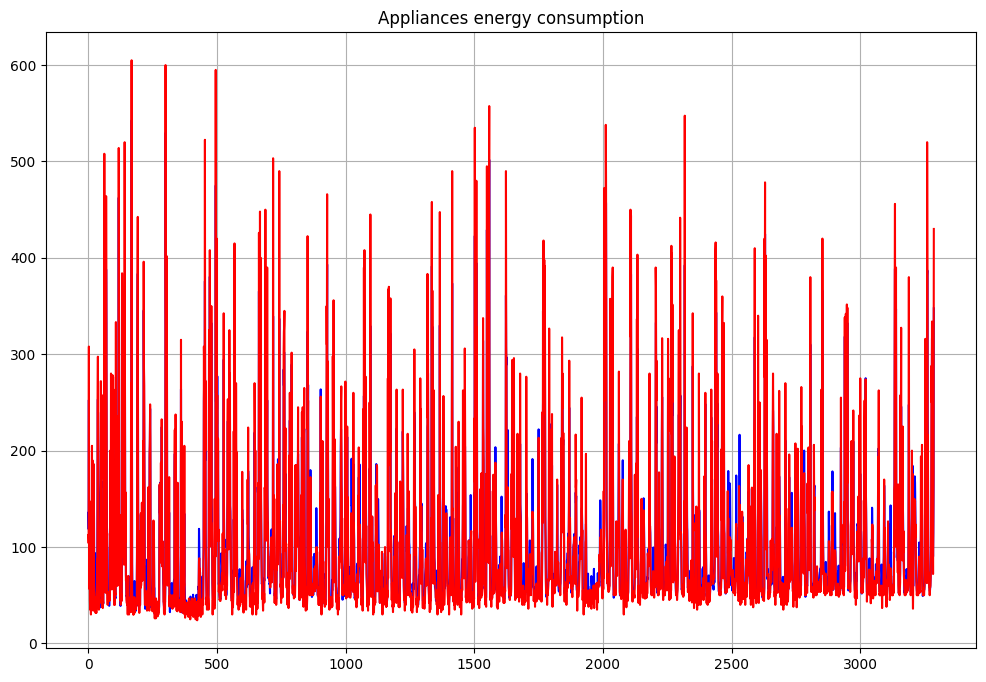

In [ ]:
pd.Series(y_pred_selected).plot(figsize=(12,8), grid=True, color='blue', title='Appliances energy consumption')
pd.Series(y).plot(figsize=(12,8), grid=True, color='red', title='Appliances energy consumption')

In [ ]:
top_features

array(['lag1_Appliances', 'lag1_NSM', 'roll3_Appliances', 'NSM',
       'lag2_Appliances', 'lights', 'Press_mm_hg', 'lag3_Appliances',
       'RH_5', 'Visibility', 'T2', 'roll6_Appliances', 'Windspeed', 'T5',
       'RH_out', 'T8'], dtype=object)

In [ ]:
df_iot_teste = pd.read_csv('projeto8-data_files/projeto8-testing.csv')
print(df_iot_teste)

                     date  Appliances  lights         T1       RH_1  \
0     2016-01-11 17:30:00          50      40  19.890000  46.066667   
1     2016-01-11 18:00:00          60      50  19.890000  45.766667   
2     2016-01-11 18:40:00         230      70  19.926667  45.863333   
3     2016-01-11 18:50:00         580      60  20.066667  46.396667   
4     2016-01-11 19:30:00         100      10  20.566667  53.893333   
...                   ...         ...     ...        ...        ...   
4927  2016-05-27 13:50:00         230       0  25.500000  47.133333   
4928  2016-05-27 14:30:00          60       0  25.566667  46.633333   
4929  2016-05-27 15:50:00         100       0  25.500000  45.633333   
4930  2016-05-27 17:20:00         100       0  25.566667  46.560000   
4931  2016-05-27 17:40:00         270      10  25.500000  46.596667   

             T2       RH_2         T3       RH_3     T4  ...  Press_mm_hg  \
0     19.200000  44.590000  19.790000  45.000000  18.89  ...   733.800

Text(0.5, 1.0, 'Correlation Heatmap')

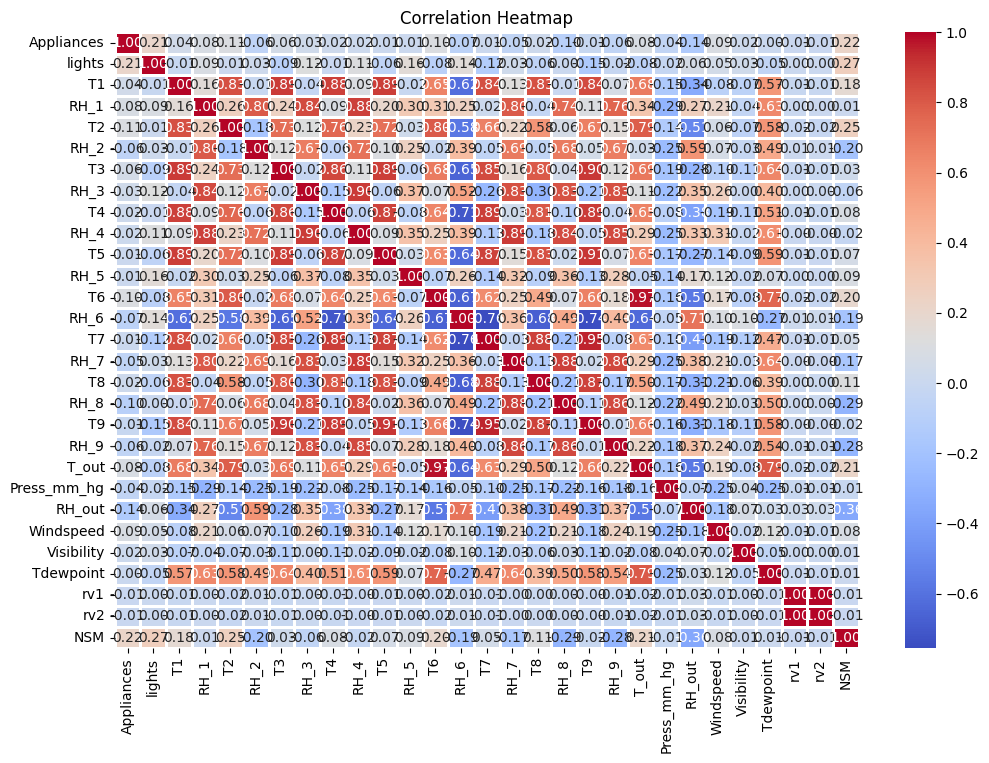

In [ ]:
df_iot_teste['date'] = pd.to_datetime(df_iot_teste['date'])
#df_iot_teste = df_iot_teste.sort_values(by=['date']).set_index('date').resample('1H').mean()
#df_iot_teste = df_iot_teste.reset_index()
plt.figure(figsize=(12, 8))
sns.heatmap(df_iot_teste.select_dtypes(include=[float,int]).corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.title('Correlation Heatmap')


In [ ]:
df_iot_teste = pd.read_csv('projeto8-data_files/projeto8-testing.csv')
#df_iot_teste['Appliances'] = df_iot_teste['Appliances'].apply(lambda x: np.nan if x > THRESHOLD_APPLIANCE else x)
#df_iot_teste.dropna(inplace=True)
df_iot_teste.drop(['Day_of_week', 'WeekStatus'], axis=1, inplace=True)
df_iot_teste['date'] = pd.to_datetime(df_iot_teste['date'])
# pensar melhor sobre a abordagem abaixo!
df_iot_teste = df_iot_teste.sort_values(by=['date']).set_index('date').resample('1H',axis=1).mean()
df_iot_teste = df_iot_teste.reset_index()
#df_iot_teste['day'] = df_iot_teste['date'].dt.day
#df_iot_teste['month'] = df_iot_teste['date'].dt.month
df_iot_teste['hour'] = df_iot_teste['date'].dt.hour
#df_iot_teste['year'] = df_iot_teste['date'].dt.year
#df_iot_teste['cat_lights'] = df_iot_teste['cat_lights'].apply(lambda x: 0 if x==0 else 1)
#df_iot_teste['lag_Appliances'] = df_iot_teste['Appliances'].shift(1)
#df_iot_teste['lag2_Appliances'] = df_iot_teste['Appliances'].shift(2)
#df_iot_teste['lag3_Appliances'] = df_iot_teste['Appliances'].shift(3)
df_iot_teste['roll3_Appliances'] = df_iot_teste['Appliances'].shift(1).rolling(window=3,min_periods=1).mean()
df_iot_teste['roll6_Appliances'] = df_iot_teste['Appliances'].shift(1).rolling(window=6,min_periods=1).mean()
df_iot_teste['roll12_Appliances'] = df_iot_teste['Appliances'].shift(1).rolling(window=12,min_periods=1).mean()

df_iot_teste['lag1_NSM'] = df_iot_teste['NSM'].shift(1)
df_iot_teste['lag1_Appliances'] = df_iot_teste['Appliances'].shift(1)
df_iot_teste['lag2_Appliances'] = df_iot_teste['Appliances'].shift(2)
df_iot_teste['lag3_Appliances'] = df_iot_teste['Appliances'].shift(3)


#df_iot_teste['Appliances'] = df_iot_teste['Appliances'].apply(lambda x: 1 if x > THRESHOLD_APPLIANCE else 0)
df_iot_teste.dropna(inplace=True)
#df_iot_teste = df_iot_teste.sort_values(by=['date']).set_index('date').resample('3H').mean()
#df_iot_teste = df_iot_teste.dropna()
#df_iot_teste_clean = df_iot_teste.drop(columns=['date']).copy()
df_iot_teste_clean = df_iot_teste.sort_values(by=['date']).copy()
df_iot_teste_clean.drop(columns=['rv1','rv2'], inplace=True)
df_iot_teste_clean.drop(['date'], axis=1, inplace=True)
#df_iot_teste_clean = df_iot_teste_clean[(df_iot_teste_clean >= 0).all(1)]
X_teste = df_iot_teste_clean.drop('Appliances', axis=1).reset_index(drop=True)
y_teste = np.round(df_iot_teste_clean['Appliances'].reset_index(drop=True))
cols = list(X_teste.columns)
X_teste = pd.DataFrame(scaler.transform(X_teste),columns=cols)
X_teste = pd.DataFrame(scaler2.transform(X_teste),columns=cols)
X_teste = X_teste[top_features]
# Evaluate model with selected features
y_pred_teste = np.round(rf_selected.predict(X_teste))

#y_pred_teste = pd.Series(y_pred_teste).apply(lambda x: 1 if x > 0.5 else 0)
mse_teste = mean_squared_error(y_teste, y_pred_teste)
r2_teste = r2_score(y_teste, y_pred_teste)

print(f"\nRandom Forest with Selected Features Performance:")
print(f"Mean Squared Error: {mse_teste:.2f}")
print(f"R² Score: {r2_teste:.2f}")
print(f"RMSE: {np.sqrt(mse_teste):.2f}")


Random Forest with Selected Features Performance:
Mean Squared Error: 6469.16
R² Score: 0.36
RMSE: 80.43


<Axes: title={'center': 'Appliances energy consumption'}>

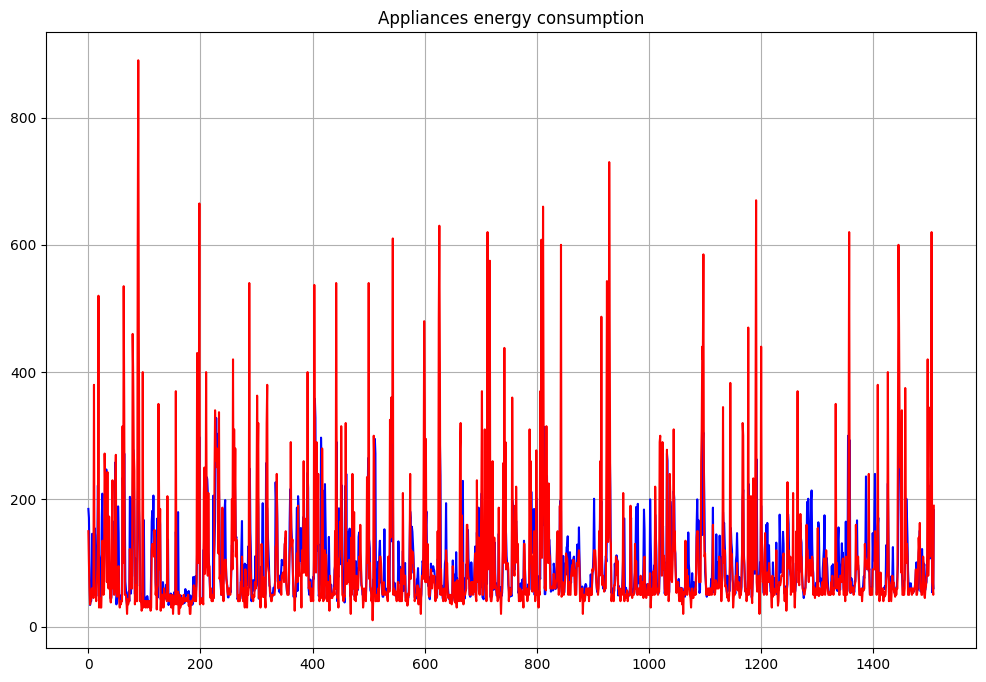

In [ ]:
pd.Series(y_pred_teste).plot(figsize=(12,8), grid=True, color='blue', title='Appliances energy consumption')
pd.Series(y_teste).plot(figsize=(12,8), grid=True, color='red', title='Appliances energy consumption')

In [ ]:
"""
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_teste,y_pred_teste))
print(classification_report(y_teste,y_pred_teste))
"""

'\nfrom sklearn.metrics import confusion_matrix\nfrom sklearn.metrics import classification_report\n\nprint(confusion_matrix(y_teste,y_pred_teste))\nprint(classification_report(y_teste,y_pred_teste))\n'

In [ ]:
#df_iot_teste.set_index('date').resample('H').mean().plot(y='Appliances', figsize=(12, 6))
X_teste.shape

(1509, 16)

In [ ]:
X_teste.head()

,lag1_Appliances,lag1_NSM,roll3_Appliances,NSM,lag2_Appliances,lights,Press_mm_hg,lag3_Appliances,RH_5,Visibility,T2,roll6_Appliances,Windspeed,T5,RH_out,T8
0,0.104991,0.826446,0.246814,0.865407,0.457831,1.0,0.138403,0.044750,0.759354,0.6,0.306085,0.291447,0.443709,0.227239,0.832501,0.231886
1,0.216867,0.865407,0.321044,0.904368,0.104991,0.5,0.145012,0.457831,0.495851,0.6,0.334800,0.297084,0.443709,0.323337,0.833611,0.262025
2,0.130809,0.904368,0.180007,0.961039,0.216867,0.5,0.159397,0.104991,0.327371,0.6,0.359238,0.273410,0.509934,0.385221,0.829174,0.270328
3,0.036145,0.100354,0.402697,0.142857,0.320138,0.0,0.231514,0.612737,0.304594,0.6,0.267229,0.338344,0.377483,0.328308,0.901276,0.262025
4,0.018933,0.142857,0.146604,0.160567,0.036145,0.0,0.238317,0.320138,0.303899,0.6,0.263930,0.303172,0.443709,0.323337,0.906822,0.252799


In [ ]:
np.round(y_teste)

0       150.0
1       100.0
2        60.0
3        35.0
4        40.0
        ...  
1504    620.0
1505     70.0
1506     60.0
1507     50.0
1508    190.0
Name: Appliances, Length: 1509, dtype: float64